## Week 6: Dimensionality Reduction

**(1a) Load the data file 'data1.csv' and visualize the data.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
data1 = pd.read_csv('data1.csv', header = None)

In [3]:
data1.columns = ['X', 'Y']

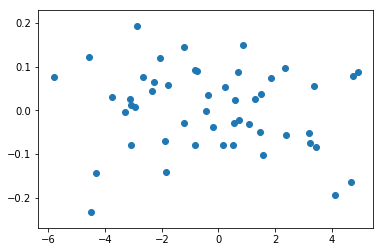

In [4]:
plt.scatter(data1['X'], data1['Y'])

**Let $\bar{x} = (x_1, x_2, x_3, \cdots, x_m)$ denote a data point with $m$ features. Suppose we approximate $\bar{x}$ with fewer features, say two features $x_1$ and $x_2$, as $\bar{y} = (x_1, x_2, 0, \cdots, 0)$. Now, define the loss due to the representation as $\lVert \bar{x} - \bar{y} \rVert^2 = x_3^2 + \cdots + x_m^2$. **

**(1b) Find a single feature representation of the data (in data1.csv) such that the loss in representation is minimum.**

In [5]:
data1_val = data1.values

In [6]:
print('Removing X: ',sum(data1_val[:,0]**2))
print('Removing Y: ',sum(data1_val[:,1]**2))

Removing X:  358.1035064241586
Removing Y:  0.41912655244582403


- single Feature is X

**(1c) Visualize the approximated data and compare it with the original data.**

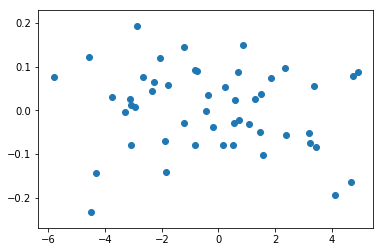

In [7]:
plt.scatter(data1_val[:,0], data1_val[:,1])

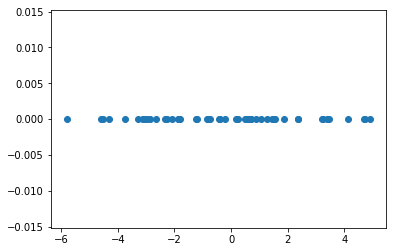

In [8]:
plt.scatter(data1_val[:,0], [0]*data1.shape[0])

**(2a) Load the data file 'data2.csv'.**

In [9]:
data2 = pd.read_csv('data2.csv', header = None)

In [10]:
data2.head()

,0,1,2,3
0,0.007589,-8.886696,-12.316361,-0.036092
1,-1.461927,3.977425,-17.784232,0.075197
2,-0.891625,-7.426320,25.122113,-0.150440
3,1.057471,4.184783,39.927021,0.068328
4,0.147645,-0.309380,33.502600,-0.125913


In [11]:
data2.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067112,0.072503,2.325471,0.004217
std,0.993578,6.259568,31.764600,0.071365
min,-3.357059,-19.556507,-106.539193,-0.195731
25%,-0.724800,-4.050040,-18.678191,-0.043543
50%,-0.113790,0.247195,1.601342,0.003002
75%,0.598069,4.176119,24.569531,0.053882
max,2.848085,18.926040,88.267303,0.260059


**(2c) Plot the minimum representation loss as a function of the number of features used for representation.**

**(2c) Order the features in decreasing order of significance (with respect to the representation loss).**

In [12]:
drop_data2 = data2.copy()

In [13]:
drop_data2[1] = 0

In [14]:
min_rep_loss = []
min_loss = 9999999
for i in range(4):
    dist = sum(data2[i]**2)
    print('Keeping column ',i,': representation loss: ', dist)
    if dist < min_loss:
        min_loss = dist
min_rep_loss.append(min_loss)
print(min_loss)

Keeping column  0 : representation loss:  990.7130563191931
Keeping column  1 : representation loss:  39148.2647749031
Keeping column  2 : representation loss:  1013388.6230866597
Keeping column  3 : representation loss:  5.105685170912923
5.105685170912923


**(2d) Compute the covariance matrix of the $m$ features. Comment with respect to (2c).**

In [15]:
data2.cov()

,0,1,2,3
0,0.987196,-0.057179,-0.140991,0.003057
1,-0.057179,39.182190,0.116676,-0.007770
2,-0.140991,0.116676,1008.989796,0.055835
3,0.003057,-0.007770,0.055835,0.005093


**(3a) Load the data file 'data3.csv' and visualize the data.**

**(3b) Compute the covariance matrix $C$ of the $m$ features.**

In [16]:
data3 = pd.read_csv('data3.csv', header = None)

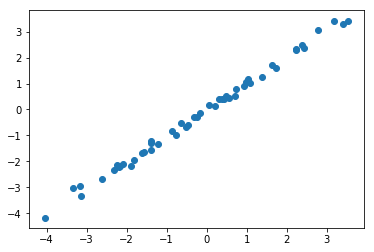

In [17]:
plt.scatter(data3.iloc[:,0], data3.iloc[:,1])

In [18]:
data3.head()

,0,1
0,-2.173608,-2.191730
1,1.634760,1.715328
2,-0.461201,-0.587819
3,-0.760849,-0.966327
4,-1.387257,-1.554868


In [19]:
data3.cov()

,0,1
0,3.594166,3.617564
1,3.617564,3.658059


In [20]:
cov_matrix = data3.cov()
print(cov_matrix)

          0         1
0  3.594166  3.617564
1  3.617564  3.658059


**(3c) Uncorrelate the covariance matrix $C$ using an orthonormal transformation (rotation).**

In [21]:
eig_val, eig_vec = np.linalg.eig(cov_matrix)

In [22]:
print(eig_val)
print(eig_vec)

[0.00840733 7.24381702]
[[-0.710222   -0.70397777]
 [ 0.70397777 -0.710222  ]]


In [23]:
s = np.diag(np.sqrt(eig_val))
print(s)

[[0.09169148 0.        ]
 [0.         2.69143401]]


**(3d) Apply the transformation to the data points. Now, visualize the data points.**

In [64]:
transformed_x = np.matmul(eig_vec, np.matmul(s, data3.values.T))

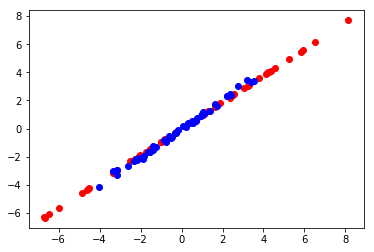

In [65]:
plt.scatter(transformed_x[0,:], transformed_x[1,:], c = 'r')
plt.scatter(data3.values[:,0], data3.values[:,1], c = 'b')

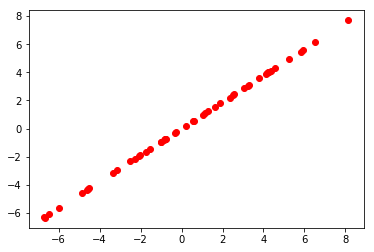

In [66]:
plt.scatter(transformed_x[0,:], transformed_x[1,:], c = 'r')

**(3e) Find a one-dimensional representation of the data such that the representation loss is minimum.**

**(3f) Reverse the (rotation) transformation on the approximated data and visualize the data.**

In [63]:
print(transformed_x)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


In [67]:
print('Removing First column : ', sum(transformed_x[0,:]**2))
print('Removing Second column: ', sum(transformed_x[1,:]**2))

Removing First column :  694.1430484080046
Removing Second column:  617.4321822439841


In [68]:
approx_data = transformed_x.T
approx_data[:,1] = 0

In [69]:
print(approx_data)

[[ 4.29424008  0.        ]
 [-3.35650714  0.        ]
 [ 1.14377969  0.        ]
 [ 1.88045599  0.        ]
 [ 3.03636416  0.        ]
 [ 5.81027198  0.        ]
 [-5.96474972  0.        ]
 [ 3.77536813  0.        ]
 [-0.79569628  0.        ]
 [ 1.2817607   0.        ]
 [ 4.20992723  0.        ]
 [ 3.22650263  0.        ]
 [-6.70185361  0.        ]
 [-1.74651906  0.        ]
 [-1.01280518  0.        ]
 [-4.87720482  0.        ]
 [-2.29305734  0.        ]
 [ 1.63482928  0.        ]
 [ 0.60104556  0.        ]
 [-4.57766922  0.        ]
 [ 3.29556464  0.        ]
 [-6.69217293  0.        ]
 [-4.49715096  0.        ]
 [ 2.5198759   0.        ]
 [-1.52610692  0.        ]
 [ 2.56248489  0.        ]
 [-2.07788484  0.        ]
 [ 8.14634614  0.        ]
 [ 4.1838148   0.        ]
 [ 5.22554257  0.        ]
 [-6.46415745  0.        ]
 [-0.77585094  0.        ]
 [ 0.57929679  0.        ]
 [ 4.54469997  0.        ]
 [-0.81569311  0.        ]
 [-0.84225403  0.        ]
 [-4.62148901  0.        ]
 

In [70]:
r_inv = eig_vec.T
s_inv = np.linalg.inv(s)

In [71]:
rev_transformed_data = np.matmul(s_inv, np.matmul(r_inv, approx_data.T))

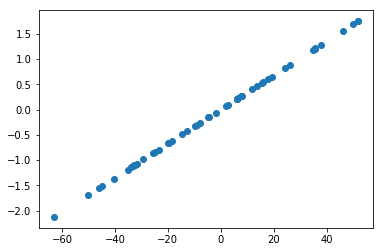

In [72]:
plt.scatter(rev_transformed_data[0,:],rev_transformed_data[1,:])

**(3e) Compute the representational loss (with respect to the original data).**

**(3f) Compare the above representation loss with the loss your would incur if you attempted a one-dimensional representation without any transformation. Comment on it.**


In [73]:
print(sum((rev_transformed_data.T - data3)**2))

1


In [74]:
print(min(sum(data3.values[:,0]**2), sum(data3.values[:,1]**2)))

177.6674955960155


**(4a) Load the data file 'data4.csv'.**

**(4b) Plot the representation loss as a function of the number of features (in the transformed domain) used for representation.**

In [86]:
data4 = pd.read_csv('data4.csv', header = None)

In [87]:
data4.head()

,0,1,2,3
0,0.886636,5.414102,5.414102,-0.050537
1,1.571465,-4.373945,-4.373945,-0.046006
2,0.344091,-13.850319,-13.850319,-0.008261
3,-1.904044,-0.465430,-0.465430,-0.104967
4,0.321489,-1.487056,-1.487056,0.009423


In [92]:
cov_mat = data4.cov()
print(cov_mat)

          0          1          2         3
0  0.963091   0.041449   0.041449 -0.002040
1  0.041449  41.235446  41.235446 -0.013883
2  0.041449  41.235446  41.235446 -0.013883
3 -0.002040  -0.013883  -0.013883  0.005090


In [93]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [94]:
print(eig_val)
print(eig_vec)

[ 8.24709393e+01  9.63053418e-01  5.08138259e-03 -4.13745755e-15]
[[ 7.19181129e-04  9.99997504e-01  2.11518885e-03 -8.73314050e-11]
 [ 7.07106578e-01 -5.08892767e-04  1.67290613e-04  7.07106781e-01]
 [ 7.07106578e-01 -5.08892881e-04  1.67286360e-04 -7.07106781e-01]
 [-2.38103322e-04 -2.11501810e-03  9.99997735e-01 -3.00691129e-09]]


Since the 4th eigen value is very small and close to zero it can be considered as zero, because it is formed due to the noise in the data and scaling matrix requires positive eigen values.

In [95]:
eig_val[3] = 0
s = np.diag(np.sqrt(eig_val))
print(s)

[[9.08135118 0.         0.         0.        ]
 [0.         0.98135285 0.         0.        ]
 [0.         0.         0.07128382 0.        ]
 [0.         0.         0.         0.        ]]


In [97]:
transformed_x = np.matmul(eig_vec, np.matmul(s, data4.values.T))

In [98]:
print('keeping only first column: ', sum(transformed_x[:,0]**2))
print('keeping only second column: ', sum(transformed_x[:,1]**2))
print('keeping only third column: ', sum(transformed_x[:,2]**2))
print('keeping only fourth column: ', sum(transformed_x[:,3]**2))

keeping only first column:  93.21081186692534
keeping only second column:  222.18391967801983
keeping only third column:  195.48305796802245
keeping only fourth column:  299.19844388162556


In [101]:
rep_loss = []
rep_loss.append(sum(transformed_x[:,0]**2))
rep_loss.append(sum(transformed_x[:,0]**2) + sum(transformed_x[:,2]**2))
rep_loss.append(sum(transformed_x[:,0]**2 + sum(transformed_x[:,2]**2) + sum(transformed_x[:,1]**2)))
rep_loss.append(sum(transformed_x[:,0]**2 + sum(transformed_x[:,2]**2) + sum(transformed_x[:,1]**2) + sum(transformed_x[:,3]**2)))

In [102]:
print(rep_loss)

[93.21081186692534, 288.6938698349478, 1763.8787224510943, 2960.672497977597]


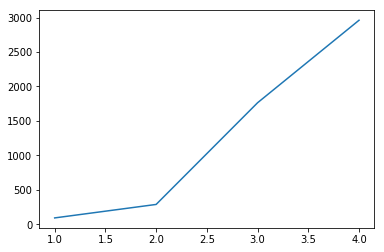

In [103]:
plt.plot([1,2,3,4], rep_loss)

# Application

**(5a) Load the human face data set given below.**

In [111]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [106]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

** faces.data should contain vectorized 1-D images. faces.images should contain 2-D images.**

**(5b) Visualize the data set.**

In [116]:
faces.images[0].shape

(62, 47)

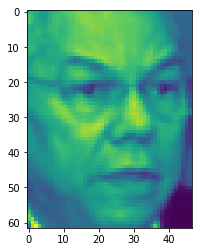

In [107]:
plt.imshow(faces.images[0])

**(5c) Take faces.data and apply PCA. **

In [108]:
data = faces.data

In [109]:
data.shape

(1348, 2914)

In [112]:
pca = PCA(n_components = 150)

In [113]:
transformed_x = pca.fit_transform(data)

**(5c) Take the top 150 features from PCA. Reconstruct the images with the top 150 features and visualize it. Comment.**

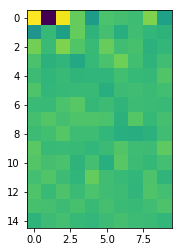

In [127]:
plt.imshow(np.reshape(transformed_x[5], (15,10)))

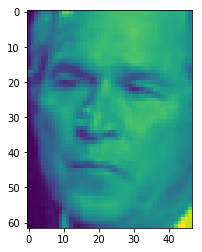

In [126]:
plt.imshow(np.reshape(data[5], (62,47)))

**(5d) Consider any two classes (categories, e.g., humans) from the data set. Compare the performance of logistic regression with and without PCA. Comment on the classification accuracy. (Optional). **